In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import classification_report

In [2]:
synthetic_data_path = "../../Datos/synthetic_data/correlated_attribute_mode/synthetic_data_train.csv"
real_data_path = "../../Datos/features_parquet/df_skroutz_cpus_select_12.parquet"
synt_real_data_path = "../../Datos/features_parquet/df_cpus_select_skroutz_synt.parquet"

In [3]:
df_cpus = pd.read_parquet(real_data_path, engine="pyarrow")

In [4]:
df_cpus

,ProductID,ProductID2,same_product,levenshtain_distance,needleman_wunsch_distance,affine_gap_distance,smith_waterman_distance,jaro_distance,jaro_winkler_distance,overlap_coefficient_distance,generalized_jaccard_distance,tfidf_distance,soft_tfidf_distance,partial_ration_distance,bag_distance_distance
0,amd ryzen 5 1600 box epexergastis me wraith sp...,amd ryzen 5 1600 box epexergastis me wraith sp...,True,0.000000,0.000000,0.000000,0.000000,0.987654,0.000000,0.000000,0.000000,0.000000,0.987654,0.00,0.000000
1,amd ryzen 5 1600 box epexergastis me wraith sp...,amd ryzen 5 1600,True,0.802469,1.203704,0.966667,0.802469,0.990957,0.000000,0.000000,0.714286,0.635338,0.995498,0.00,0.802469
2,amd ryzen 5 1600 box epexergastis me wraith sp...,amd ryzen 5 1600 box pliromi ke se eos 36 dosis,True,0.506173,0.716049,0.619753,0.691358,0.990732,0.000000,0.272727,0.529412,0.659832,0.992907,0.40,0.456790
3,amd ryzen 5 1600 box epexergastis me wraith sp...,amd ryzen 5 1600 yd1600bbaebox,True,0.753086,1.067901,0.893827,0.790123,0.992123,0.000000,0.200000,0.733333,0.742145,0.996817,0.33,0.716049
4,amd ryzen 5 1600 box epexergastis me wraith sp...,amd ryzen 5 1600 box yd1600bbaebox,True,0.703704,0.993827,0.834568,0.740741,0.991918,0.000000,0.166667,0.666667,0.698489,0.994954,0.35,0.679012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632831,amd a6 7400k kaveri dual core 3.5ghz socket fm...,intel xeon e3 1240v3 3.4 ghz quad core socket ...,False,0.796117,0.936893,0.841748,0.864078,0.994474,0.430814,0.846154,0.925926,0.961280,0.994488,0.68,0.475728
3632832,amd a6 7400k kaveri dual core 3.5ghz socket fm...,amd a series a6 7400k 3.5 ghz 2 cores 1 mb cache,True,0.728155,0.995146,0.858252,0.854369,0.993483,0.000000,0.750000,0.880000,0.935225,0.993468,0.54,0.533981
3632833,amd a6 7400k kaveri dual core 3.5ghz socket fm...,amd a6 7400k 3.5 ghz dual core socket fm2 65w ...,True,0.553398,0.747573,0.640777,0.718447,0.993134,0.000000,0.416667,0.666667,0.794561,0.993187,0.41,0.436893
3632834,amd a6 7400k kaveri dual core 3.5ghz socket fm...,amd kaveri a6 7400k 2c box 3 5ghz 1mb,True,0.757282,1.077670,0.926214,0.893204,0.994115,0.000000,0.555556,0.809524,0.886772,0.993741,0.41,0.660194


In [5]:
synthetic_df = pd.read_csv(synthetic_data_path,header=0)

In [6]:
synthetic_df["same_product"] = 1

In [7]:
synthetic_df.shape

(50000, 13)

In [8]:
df_cpus.drop(columns=["ProductID", "ProductID2"],inplace=True,axis=1)

In [9]:
df_cpus[["same_product"]] = df_cpus[["same_product"]].astype(int)

In [10]:
appended_cpus  = pd.concat([df_cpus,synthetic_df],ignore_index=True).reset_index(drop=True)

In [11]:
appended_cpus

,same_product,levenshtain_distance,needleman_wunsch_distance,affine_gap_distance,smith_waterman_distance,jaro_distance,jaro_winkler_distance,overlap_coefficient_distance,generalized_jaccard_distance,tfidf_distance,soft_tfidf_distance,partial_ration_distance,bag_distance_distance
0,1,0.000000,0.000000,0.000000,0.000000,0.987654,0.000000,0.000000,0.000000,0.000000,0.987654,0.000000,0.000000
1,1,0.802469,1.203704,0.966667,0.802469,0.990957,0.000000,0.000000,0.714286,0.635338,0.995498,0.000000,0.802469
2,1,0.506173,0.716049,0.619753,0.691358,0.990732,0.000000,0.272727,0.529412,0.659832,0.992907,0.400000,0.456790
3,1,0.753086,1.067901,0.893827,0.790123,0.992123,0.000000,0.200000,0.733333,0.742145,0.996817,0.330000,0.716049
4,1,0.703704,0.993827,0.834568,0.740741,0.991918,0.000000,0.166667,0.666667,0.698489,0.994954,0.350000,0.679012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682831,1,0.690834,1.050317,0.885118,0.744702,0.993083,0.416076,0.260116,0.773839,0.797880,0.987905,0.188986,0.707404
3682832,1,0.529962,0.696589,0.540996,0.595935,0.990183,0.388814,0.374681,0.648479,0.760670,0.993911,0.390917,0.414616
3682833,1,0.014039,0.029926,0.018447,0.009568,0.981377,0.002553,0.013502,0.034471,0.041794,0.983134,0.025316,0.037254
3682834,1,0.667014,0.746943,0.611267,0.696499,0.993476,0.297285,0.534349,0.746225,0.829836,0.991052,0.501286,0.308836


In [12]:
appended_cpus.to_parquet(synt_real_data_path,index=False)

In [13]:
X = appended_cpus[["levenshtain_distance", "needleman_wunsch_distance", "affine_gap_distance", "smith_waterman_distance", "jaro_distance", "jaro_winkler_distance", "overlap_coefficient_distance", "generalized_jaccard_distance", "tfidf_distance", "soft_tfidf_distance", "partial_ration_distance", "bag_distance_distance" ]]

In [14]:
y = appended_cpus[["same_product"]]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify= y)

In [16]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
clf = BernoulliNB()
param_grid = {"alpha": [0.000001, 1.0, 0.9,1.1,1.5,2,3,4,5, 0.00001, 0.0001,0.001,0.01,0.1,0.2,0.5,0.7], "force_alpha":[True, False], "binarize":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
              "fit_prior":[True, False]}
grid_search = GridSearchCV(clf, param_grid, verbose=2, n_jobs=-1, cv=3, scoring="balanced_accuracy")

In [17]:
grid_search.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 612 candidates, totalling 1836 fits
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=True; total time=   2.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=True; total time=   3.1s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=True; total time=   3.2s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=False; total time=   3.2s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=False; total time=   3.2s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=True; total time=   3.3s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=False; total time=   3.3s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=False; total time=   3.4s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=True; total time=   3.4s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=False; total time=   3.4s
[CV] END alpha=1e-06, binarize=0.1, 

GridSearchCV(cv=3, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1.0, 0.9, 1.1, 1.5, 2, 3, 4, 5, 1e-05,
                                   0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.7],
                         'binarize': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='balanced_accuracy', verbose=2)

In [18]:
grid_search.best_params_

{'alpha': 1e-06, 'binarize': 0.9, 'fit_prior': False, 'force_alpha': True}

In [19]:
grid_search.best_score_

0.9097331133168313

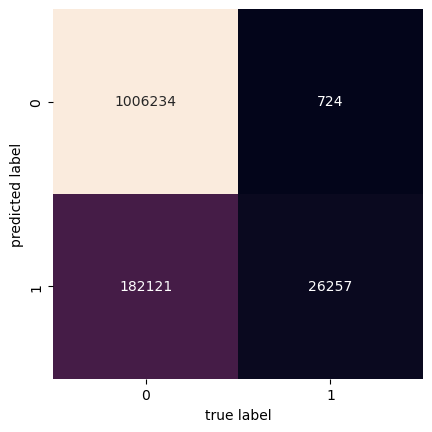

In [20]:
labels = grid_search.predict(X_test)
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [21]:
print(classification_report(y_test, labels,target_names=["Not the same product", "Same product"]))

                      precision    recall  f1-score   support

Not the same product       1.00      0.85      0.92   1188355
        Same product       0.13      0.97      0.22     26981

            accuracy                           0.85   1215336
           macro avg       0.56      0.91      0.57   1215336
        weighted avg       0.98      0.85      0.90   1215336



In [4]:
df = pd.read_parquet("../../Datos/features_parquet/df_price_cpus_select_12.parquet")

In [35]:
X = df[["levenshtain_distance", "needleman_wunsch_distance", "affine_gap_distance", "smith_waterman_distance", "jaro_distance", "jaro_winkler_distance", "overlap_coefficient_distance", "generalized_jaccard_distance", "tfidf_distance", "soft_tfidf_distance", "partial_ration_distance", "bag_distance_distance" ]]


In [36]:
y = df[["same_product"]]

In [37]:
bernoulli_model = grid_search.best_estimator_

In [38]:
bernoulli_model.score(X,y) #Precision

0.7325240877599825

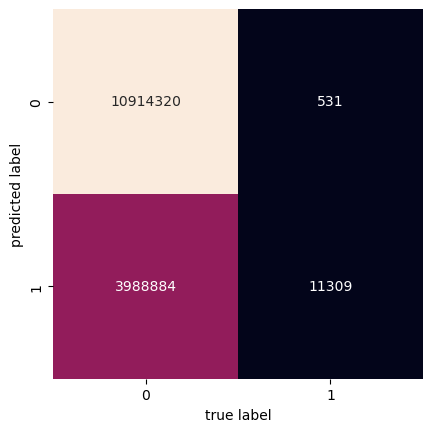

In [39]:
labels = bernoulli_model.predict(X)
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [40]:
print(classification_report(y, labels,target_names=["Not the same product", "Same product"]))


                      precision    recall  f1-score   support

Not the same product       1.00      0.73      0.85  14903204
        Same product       0.00      0.96      0.01     11840

            accuracy                           0.73  14915044
           macro avg       0.50      0.84      0.43  14915044
        weighted avg       1.00      0.73      0.84  14915044



Testing with Copulas

In [4]:
df_cpus = pd.read_parquet(real_data_path, engine="pyarrow")

In [5]:
path_synthetic_copulas = "../../Datos/synthetic_data/correlated_attribute_mode/synthetic_data_copulas.parquet"

In [6]:
df_synthetic_copulas = pd.read_parquet(path_synthetic_copulas, engine="pyarrow")

In [7]:
df_cpus.drop(columns=["ProductID", "ProductID2"],inplace=True,axis=1)

In [8]:
df_synthetic_copulas["same_product"] = 1

In [10]:
appended_cpus  = pd.concat([df_cpus,df_synthetic_copulas],ignore_index=True).reset_index(drop=True)

In [11]:
appended_cpus

,same_product,levenshtain_distance,needleman_wunsch_distance,affine_gap_distance,smith_waterman_distance,jaro_distance,jaro_winkler_distance,overlap_coefficient_distance,generalized_jaccard_distance,tfidf_distance,soft_tfidf_distance,partial_ration_distance,bag_distance_distance
0,1,0.000000,0.000000,0.000000,0.000000,0.987654,0.000000,0.000000,0.000000,0.000000,0.987654,0.000000,0.000000
1,1,0.802469,1.203704,0.966667,0.802469,0.990957,0.000000,0.000000,0.714286,0.635338,0.995498,0.000000,0.802469
2,1,0.506173,0.716049,0.619753,0.691358,0.990732,0.000000,0.272727,0.529412,0.659832,0.992907,0.400000,0.456790
3,1,0.753086,1.067901,0.893827,0.790123,0.992123,0.000000,0.200000,0.733333,0.742145,0.996817,0.330000,0.716049
4,1,0.703704,0.993827,0.834568,0.740741,0.991918,0.000000,0.166667,0.666667,0.698489,0.994954,0.350000,0.679012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682831,1,0.572282,0.865938,0.712016,0.765504,0.982670,0.000372,0.264955,0.624085,0.740420,0.986528,0.402213,0.578336
3682832,1,0.687453,1.009158,0.831249,0.821817,0.994607,0.003447,0.188601,0.735831,0.796010,0.993657,0.417549,0.635465
3682833,1,0.641294,0.814062,0.691692,0.732757,0.990201,0.299328,0.184586,0.638901,0.728857,0.992318,0.480751,0.370099
3682834,1,0.132234,0.201942,0.164024,0.135699,0.980612,0.000284,0.005804,0.009447,0.049200,0.978512,0.001700,0.139780


In [12]:
X = appended_cpus[["levenshtain_distance", "needleman_wunsch_distance", "affine_gap_distance", "smith_waterman_distance", "jaro_distance", "jaro_winkler_distance", "overlap_coefficient_distance", "generalized_jaccard_distance", "tfidf_distance", "soft_tfidf_distance", "partial_ration_distance", "bag_distance_distance" ]]

In [13]:
y = appended_cpus[["same_product"]]

In [14]:
X

,levenshtain_distance,needleman_wunsch_distance,affine_gap_distance,smith_waterman_distance,jaro_distance,jaro_winkler_distance,overlap_coefficient_distance,generalized_jaccard_distance,tfidf_distance,soft_tfidf_distance,partial_ration_distance,bag_distance_distance
0,0.000000,0.000000,0.000000,0.000000,0.987654,0.000000,0.000000,0.000000,0.000000,0.987654,0.000000,0.000000
1,0.802469,1.203704,0.966667,0.802469,0.990957,0.000000,0.000000,0.714286,0.635338,0.995498,0.000000,0.802469
2,0.506173,0.716049,0.619753,0.691358,0.990732,0.000000,0.272727,0.529412,0.659832,0.992907,0.400000,0.456790
3,0.753086,1.067901,0.893827,0.790123,0.992123,0.000000,0.200000,0.733333,0.742145,0.996817,0.330000,0.716049
4,0.703704,0.993827,0.834568,0.740741,0.991918,0.000000,0.166667,0.666667,0.698489,0.994954,0.350000,0.679012
...,...,...,...,...,...,...,...,...,...,...,...,...
3682831,0.572282,0.865938,0.712016,0.765504,0.982670,0.000372,0.264955,0.624085,0.740420,0.986528,0.402213,0.578336
3682832,0.687453,1.009158,0.831249,0.821817,0.994607,0.003447,0.188601,0.735831,0.796010,0.993657,0.417549,0.635465
3682833,0.641294,0.814062,0.691692,0.732757,0.990201,0.299328,0.184586,0.638901,0.728857,0.992318,0.480751,0.370099
3682834,0.132234,0.201942,0.164024,0.135699,0.980612,0.000284,0.005804,0.009447,0.049200,0.978512,0.001700,0.139780


In [15]:
y.groupby("same_product").agg({"same_product":"count"})

,same_product
same_product,
0,3601074
1,81762


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify= y)

In [17]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
clf = BernoulliNB()
param_grid = {"alpha": [0.000001, 1.0, 0.9,1.1,1.5,2,3,4,5, 0.00001, 0.0001,0.001,0.01,0.1,0.2,0.5,0.7], "force_alpha":[True, False], "binarize":[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
              "fit_prior":[True, False]}
grid_search = GridSearchCV(clf, param_grid, verbose=2, n_jobs=-1, cv=3, scoring="balanced_accuracy")

In [18]:
grid_search.fit(X_train, np.ravel(y_train))

Fitting 3 folds for each of 612 candidates, totalling 1836 fits
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=True; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=True; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=False; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=True; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=True; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=True; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=True; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=False, force_alpha=False; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=False; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fit_prior=True, force_alpha=False; total time=   0.9s
[CV] END alpha=1e-06, binarize=0.1, fi

GridSearchCV(cv=3, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [1e-06, 1.0, 0.9, 1.1, 1.5, 2, 3, 4, 5, 1e-05,
                                   0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.7],
                         'binarize': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='balanced_accuracy', verbose=2)

In [19]:
grid_search.best_params_

{'alpha': 1e-06, 'binarize': 0.9, 'fit_prior': False, 'force_alpha': True}

In [20]:
grid_search.best_score_

0.9131923320537699

In [27]:
labels = grid_search.best_estimator_.predict(X_test)

In [28]:
print(classification_report(y_test, labels,target_names=["Not the same product", "Same product"]))

                      precision    recall  f1-score   support

Not the same product       1.00      0.85      0.92   1188355
        Same product       0.13      0.98      0.22     26981

            accuracy                           0.85   1215336
           macro avg       0.56      0.91      0.57   1215336
        weighted avg       0.98      0.85      0.90   1215336



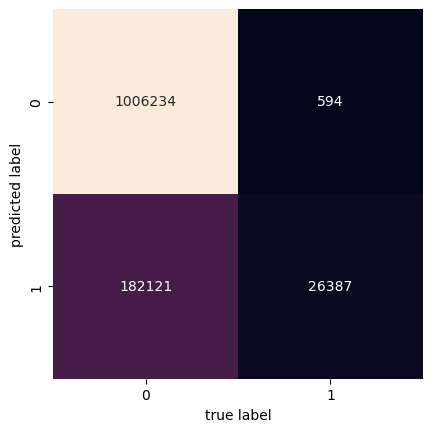

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [24]:
df = pd.read_parquet("../../Datos/features_parquet/df_price_cpus_select_12.parquet")

In [25]:
X = df[["levenshtain_distance", "needleman_wunsch_distance", "affine_gap_distance", "smith_waterman_distance", "jaro_distance", "jaro_winkler_distance", "overlap_coefficient_distance", "generalized_jaccard_distance", "tfidf_distance", "soft_tfidf_distance", "partial_ration_distance", "bag_distance_distance" ]]
y = df[["same_product"]]


In [26]:
y.groupby("same_product").agg({"same_product":"count"})

,same_product
same_product,
0,14903204
1,11840


In [30]:
labels = grid_search.best_estimator_.predict(X)
print(classification_report(y, labels,target_names=["Not the same product", "Same product"]))

                      precision    recall  f1-score   support

Not the same product       1.00      0.73      0.85  14903204
        Same product       0.00      0.96      0.01     11840

            accuracy                           0.73  14915044
           macro avg       0.50      0.84      0.43  14915044
        weighted avg       1.00      0.73      0.84  14915044



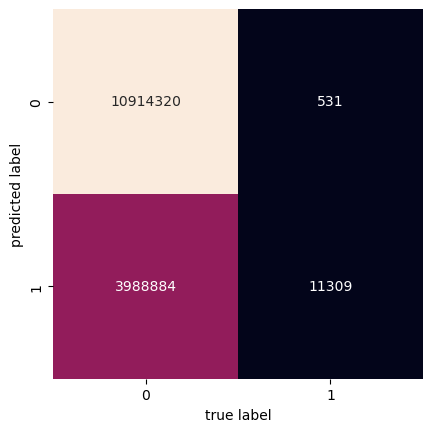

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
mat = confusion_matrix(y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');